In [5]:
#Problem 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def get_PCB(C, F, i, n):
    """
    Calculuate the price of a coupon bond given yearly coupon payments C,
    the face value F, the interest rate i, and the number of periods n.
    """    
    total = 0
    for j in range(n):
        total += C/(1+i)**(j+1)
    return total + F/(1+i)**n

def g(i):
    return get_PCB(C, F, i, n) - P

#Problem 1a

prices = np.arange(800,1101)
yields = np.zeros(len(prices))

F = 1000
C = .05 * F
n = 10

for index, price in enumerate(prices):
    P = price
    yields[index] = newton(g,.2)

yields

array([0.07977576, 0.07960391, 0.07943233, 0.07926103, 0.07909   ,
       0.07891925, 0.07874876, 0.07857855, 0.07840861, 0.07823894,
       0.07806954, 0.07790041, 0.07773155, 0.07756295, 0.07739462,
       0.07722655, 0.07705875, 0.07689121, 0.07672393, 0.07655692,
       0.07639017, 0.07622368, 0.07605744, 0.07589147, 0.07572576,
       0.0755603 , 0.0753951 , 0.07523016, 0.07506547, 0.07490104,
       0.07473686, 0.07457293, 0.07440926, 0.07424584, 0.07408266,
       0.07391974, 0.07375707, 0.07359465, 0.07343248, 0.07327055,
       0.07310887, 0.07294744, 0.07278625, 0.0726253 , 0.0724646 ,
       0.07230415, 0.07214393, 0.07198396, 0.07182423, 0.07166474,
       0.07150549, 0.07134648, 0.07118771, 0.07102917, 0.07087088,
       0.07071281, 0.07055499, 0.0703974 , 0.07024004, 0.07008292,
       0.06992604, 0.06976938, 0.06961296, 0.06945677, 0.0693008 ,
       0.06914507, 0.06898957, 0.0688343 , 0.06867926, 0.06852444,
       0.06836985, 0.06821549, 0.06806135, 0.06790744, 0.06775

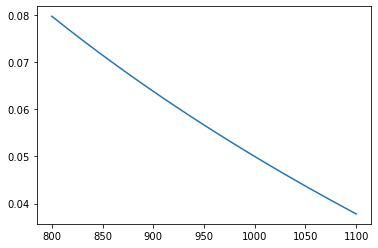

In [6]:
#Problem 1b

fig, ax = plt.subplots()

ax.plot(prices, yields)

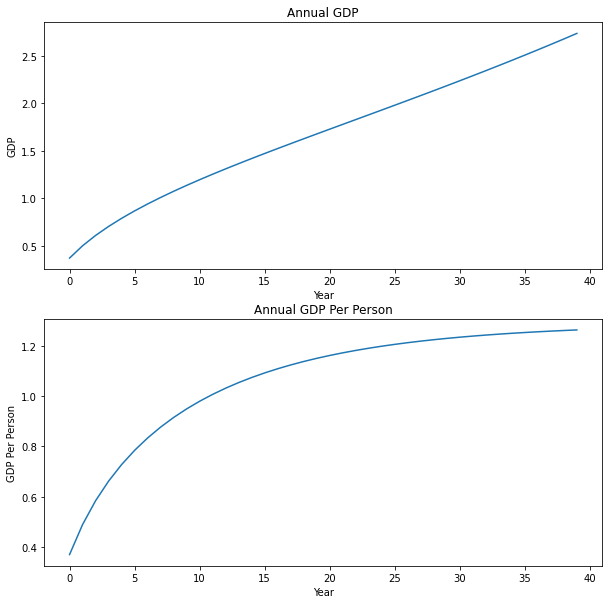

In [7]:
#Problem 2

s = .2
δ = .1
α = 1/3
n = .02
A = 1

def F(A,K,L):
    return A*(K**α)*(L**(1-α))

#Problem 2a

k = np.zeros(40)
l = np.zeros(40)
y = np.zeros(40)
k[0] = .05
l[0] = 1

for year in np.arange(40):
    K = k[year]
    L = l[year]
    y[year] = F(A,K,L)
    if year != 39:
        k[year+1] = k[year] + s*y[year] - δ*k[year]
        l[year+1] = l[year]*(1+n)

y_per_person = np.zeros(40)

for year in np.arange(40):
    y_per_person[year] = y[year] / l[year]

fig, ax = plt.subplots(2,figsize=(10,10))

ax[0].set_title("Annual GDP")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("GDP")
ax[0].plot(np.arange(40),y)

ax[1].set_title("Annual GDP Per Person")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("GDP Per Person")
ax[1].plot(np.arange(40),y_per_person)

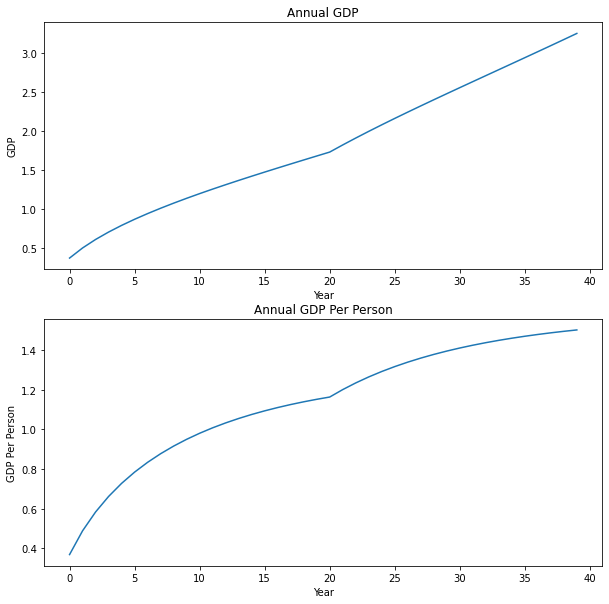

In [8]:
#Problem 2b

k = np.zeros(40)
l = np.zeros(40)
y = np.zeros(40)
k[0] = .05
l[0] = 1

for year in np.arange(40):
    if year < 20:
        s = .2
    else:
        s = .3
    K = k[year]
    L = l[year]
    y[year] = F(A,K,L)
    if year != 39:
        k[year+1] = k[year] + s*y[year] - δ*k[year]
        l[year+1] = l[year]*(1+n)

y_per_person = np.zeros(40)

for year in np.arange(40):
    y_per_person[year] = y[year] / l[year]

fig, ax = plt.subplots(2,figsize=(10,10))

ax[0].set_title("Annual GDP")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("GDP")
ax[0].plot(np.arange(40),y)

ax[1].set_title("Annual GDP Per Person")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("GDP Per Person")
ax[1].plot(np.arange(40),y_per_person)


0.3


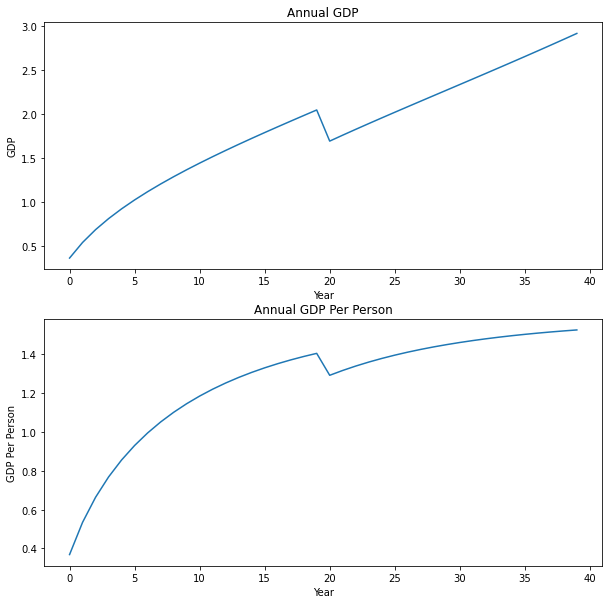

In [9]:
#Problem 2c

k = np.zeros(40)
l = np.zeros(40)
y = np.zeros(40)
k[0] = .05
l[0] = 1

for year in np.arange(40):        
    K = k[year]
    L = l[year]
    y[year] = F(A,K,L)
    if year != 39 and year != 19:
        k[year+1] = k[year] + s*y[year] - δ*k[year]
        l[year+1] = l[year]*(1+n)
    elif year == 19:
        k[year+1] = k[year]*.7
        l[year+1] = l[year]*.9

y_per_person = np.zeros(40)

for year in np.arange(40):
    y_per_person[year] = y[year] / l[year]

fig, ax = plt.subplots(2,figsize=(10,10))

ax[0].set_title("Annual GDP")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("GDP")
ax[0].plot(np.arange(40),y)

ax[1].set_title("Annual GDP Per Person")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("GDP Per Person")
ax[1].plot(np.arange(40),y_per_person)

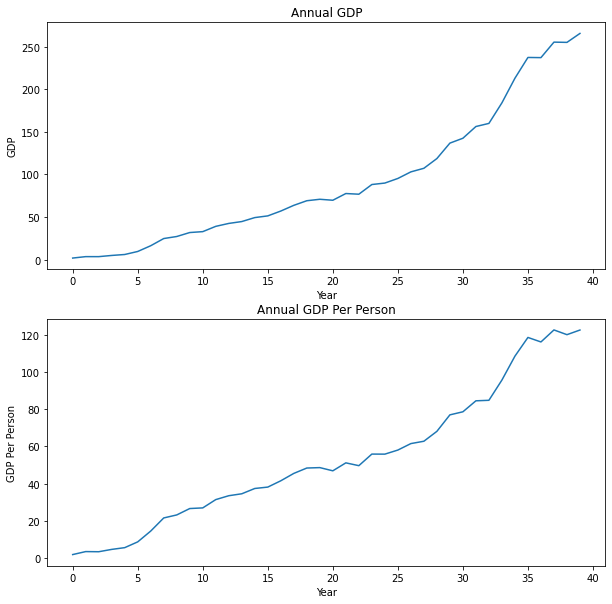

In [6]:
#Problem 2d
from scipy.stats import norm

s = .2
δ = .1
α = 1/3
n = .02

def F(A,K,L):
    return A*(K**α)*(L**(1-α))

k = np.zeros(40)
l = np.zeros(40)
y = np.zeros(40)
a = np.zeros(40)
ϵ = norm.rvs(size=40)
#ϵ = norm.rvs(size=40, scale=5) increase standard deviation of disturbance term

k[0] = .05
l[0] = 1
a[0] = 5

for year in np.arange(40):
    A = a[year]
    K = k[year]
    L = l[year]
    y[year] = F(A,K,L)
    if year != 39:
        k[year+1] = k[year] + s*y[year] - δ*k[year]
        l[year+1] = l[year]*(1+n)
        a[year+1] = a[year]*1.02 + ϵ[year+1]

y_per_person = np.zeros(40)

for year in np.arange(40):
    y_per_person[year] = y[year] / l[year]

fig, ax = plt.subplots(2,figsize=(10,10))

ax[0].set_title("Annual GDP")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("GDP")
ax[0].plot(np.arange(40),y)

ax[1].set_title("Annual GDP Per Person")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("GDP Per Person")
ax[1].plot(np.arange(40),y_per_person)

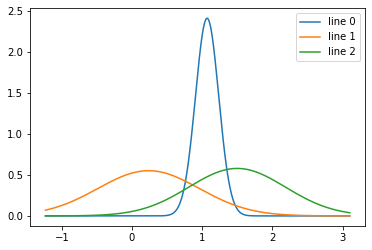

In [7]:
#Problem 3

means = norm.rvs(size=3)
stds = norm.rvs(size=3)

for index,std in enumerate(stds):
    if std < 0:
        stds[index] *= -1

x = np.linspace(np.average(means)-3*np.amax(stds),np.average(means)+3*np.amax(stds),1000)

for index,(mean,std) in enumerate(zip(means,stds)):
    pdf_x = norm.pdf(x,loc=mean,scale=std)
    plt.plot(x,pdf_x,label="line {}".format(index))

plt.legend()
plt.show()